# Livrable 1 : Modélisation  du problème

## 1. Contexte

Dans le but de l’amélioration des modes de transport et la réduction de la pollution, l’entreprise ADEME a récemment lancé un appel à manifestation d'intérêt. Le but est de promouvoir la réalisation de démonstrateurs et d'expérimentations de nouvelles solutions de mobilité pour les personnes et les marchandises adaptées à différents types de territoires.

Étant connue dans le milieu de Mobilité Multimodale Intelligente notre société, CesiCDP, a répondu à l’appel d’offres de ADEME.

## 2. Définition du périmètre d'étude du problème 

### 1. Reformulation du problème : 

Nous avons donc pour objectif de trouver un itinéraire passant par tous les points de livraison, tout en veillant à retourner au point de départ, et en prenant le moins de temps possible.

### 2. Rappel des objectifs de l'étude :

Par conséquent, nous devons avant tout générer une tournée de livraison, par un graphe, on peut considérer **les villes comme sommets** et **les axes routiers comme arêtes** de notre graphe.
À la suite de cela, on doit optimiser le trafic entre chaque axe routier, et pour ce faire, on va réaliser une étude statistique du comportement du trafic.

### 3. Explication des contraintes :

La contrainte principale de notre problème consiste à passer par tous les points de livraison et s'assurer de pouvoir retourner au point de départ, à l'entrepôt des camions.
De plus, nous avons fait le choix d'obliger le passage par des entrepôts de stockage pour récuperer les objets à livrer, avant la tournée de livraison.

## 3. Etude de complexité du problème

Pour le problème de planification de tournées de véhicules, la complexité est **NP-difficile**.
> C’est-à-dire qu’il n’existe pas à ce jour d’algorithme déterministe pouvant résoudre ce problème en temps polynomial.
Cette complexité s'étend aussi à notre problème de tournées de véhicules à fenêtre de temps.

### 1. Identification du problème à un problème d'étude connu :

Le problème d'étude connu que nous avons trouvé en commun avec le nôtre est le "Problème des tournées de véhicules avec fenêtre de temps". C'est une extension du "Problème de planification de tournées de véhicules" (Abordé et défini pour la première fois par Dantzig et Ramser (1959)), qui consiste à déterminer les tournées d'une flotte de véhicules afin de livrer une liste de clients, ou de réaliser des tournées d'interventions ou de visites. 

Le problème de la gestion de tournées de véhicules avec fenêtres de temps est 
considéré par [Solomon 1987], [Duhamel 2001]. Ce problème rajoute une contrainte temporelle sur le service demandé. C'est-à-dire que chaque client dispose d'une fenêtre de temps à laquelle il désire être servi.

## 4. Modélisation du problème

Nous avons décidé pour expliquer notre démarche de choisir quelques villes parmi une source de données réelles 
Voici ci-dessous la source de données que nous avons utilisé pour déterminer la distance entre les villes :
Villes : Nancy, Metz, Toul, Épinal, Neufchâteau, Commercy. Avec comme entrepôts Toul et Metz.

Graphe tiré des données (avec le poids des arêtes en km):

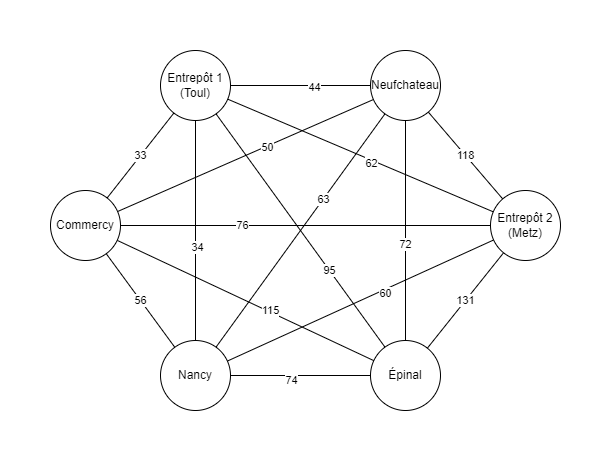


## Liens bibliographiques

- Thomas Chabot - "RÉSOLUTION DES PROBLÈMES DE TOURNÉES DE VÉHICULES POUR LE TRANSPORT DES ÉCHANTILLONS BIOMÉDICAUX AU QUÉBEC" https://corpus.ulaval.ca/jspui/bitstream/20.500.11794/26365/1/31447.pdf (2015)

- XU Jian - "Modèles stochastiques évolutionnaires pour la gestion de tournées de véhicules avec fenêtres de temps souples et demandes floues" 
https://www.lgi2a.univ-artois.fr/spip/IMG/pdf/these_jian_xu.pdf (18 décembre 2007)

